In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,4.000000e-06,0.691970,0.627192,0.196598,0.213911,0.229063,0.237047,0.241540,0.248207,...,0.285274,0.311749,0.322757,0.288485,0.172096,0.035775,0.001011,0.000000,0.000000,0.664590
1,2,6.894754e-06,0.656914,0.632444,0.163214,0.223536,0.240416,0.245071,0.251302,0.262902,...,0.303566,0.327720,0.338908,0.336594,0.293039,0.188593,0.051007,0.001001,0.000000,0.710121
2,3,1.522987e-05,0.623019,0.563200,0.253127,0.283066,0.303610,0.320574,0.324699,0.309344,...,0.233381,0.179124,0.120093,0.065717,0.029590,0.011334,0.001751,0.000000,0.000000,0.892939
3,4,2.800000e-05,0.598917,0.709429,0.155130,0.153583,0.144184,0.131675,0.116813,0.101188,...,0.072866,0.061477,0.050559,0.041514,0.052314,0.090817,0.049345,0.006748,0.000000,0.698420
4,5,4.366489e-05,0.565400,0.509598,0.350250,0.389576,0.411116,0.425304,0.430939,0.426714,...,0.410755,0.396453,0.372265,0.333721,0.288650,0.235592,0.172461,0.098511,0.026336,0.897086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,4.869946e-07,0.276597,0.513134,0.552475,0.554671,0.555783,0.555983,0.556130,0.555847,...,0.553567,0.551899,0.549926,0.547118,0.543397,0.536587,0.525118,0.501968,0.438226,0.914163
96,97,2.743041e-07,0.268140,0.513294,0.555273,0.558081,0.559804,0.560898,0.561552,0.562039,...,0.561211,0.560173,0.558791,0.556504,0.552050,0.544579,0.532814,0.507682,0.438492,0.915071
97,98,1.221970e-07,0.270445,0.508909,0.558239,0.560624,0.562179,0.563335,0.564136,0.564367,...,0.564130,0.563292,0.561919,0.559631,0.555737,0.549249,0.538799,0.514270,0.445069,0.915238
98,99,3.085853e-08,0.272798,0.502795,0.570266,0.572373,0.573433,0.574152,0.574541,0.574779,...,0.573643,0.572220,0.569627,0.566613,0.562650,0.557119,0.547534,0.527622,0.463304,0.916441


(0.3, 0.6)

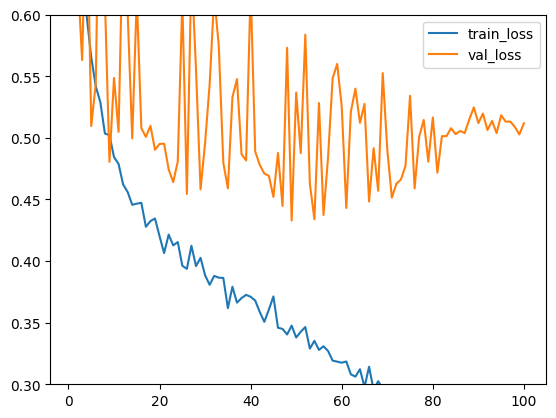

In [9]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
plt.ylim(0.3, 0.6)

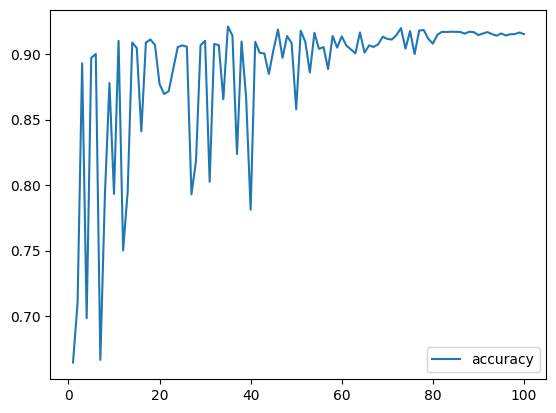

In [10]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

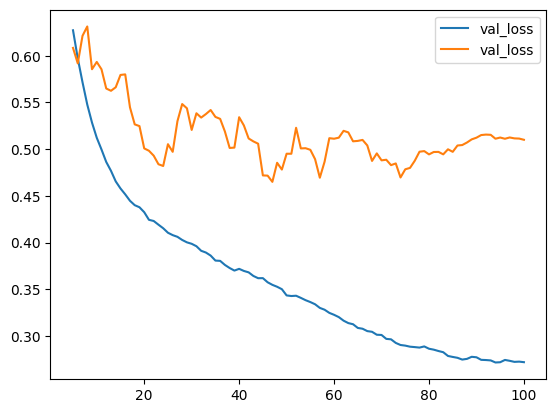

In [11]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(100, 16)
0.6133025884628296


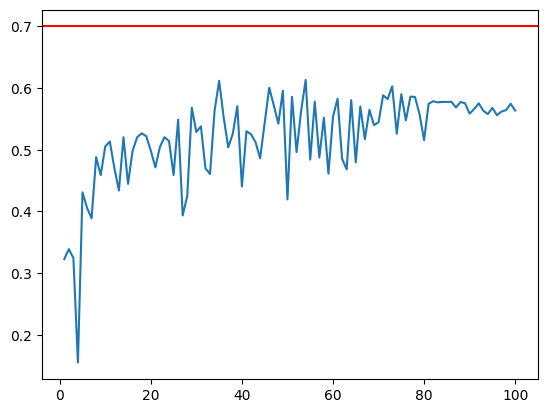

In [12]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

print(np.max(df_fbeta))

# put horizontal line at 0.55
plt.axhline(y=0.7, color='r', linestyle='-')


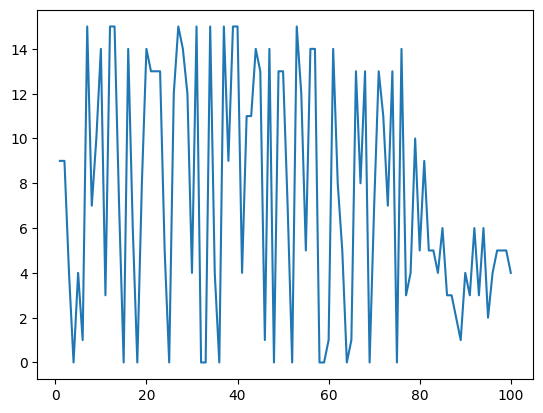

In [6]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")